In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [33]:
# reading the dataset
df = pd.read_csv('Train.csv')
df.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950


## Data prepocessing and visualization

In [5]:
# checking information for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB


In [9]:
# getting the data description
df.describe()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,565.405000,85779.287500,27795.651250,36.315000,8.732238,29.812500,16.376250,48850.921250,42.443750,4529.968687
std,159.528109,37972.705711,12819.525021,17.163012,3.670453,11.626346,10.036339,29785.455545,15.011446,2567.048232
min,300.000000,20060.000000,5097.000000,12.000000,2.510000,10.000000,0.000000,28.000000,18.000000,49.757940
25%,426.750000,53056.250000,16136.000000,24.000000,5.537500,19.925000,8.000000,21359.750000,29.000000,2377.592064
50%,553.000000,85105.000000,28518.500000,36.000000,8.725000,29.645000,16.000000,47314.500000,42.000000,4379.666025
75%,702.000000,118776.000000,38539.750000,48.000000,11.915000,40.005000,25.000000,76191.000000,55.250000,6821.026905
max,849.000000,149972.000000,49976.000000,60.000000,14.990000,49.910000,34.000000,99976.000000,69.000000,9113.843128


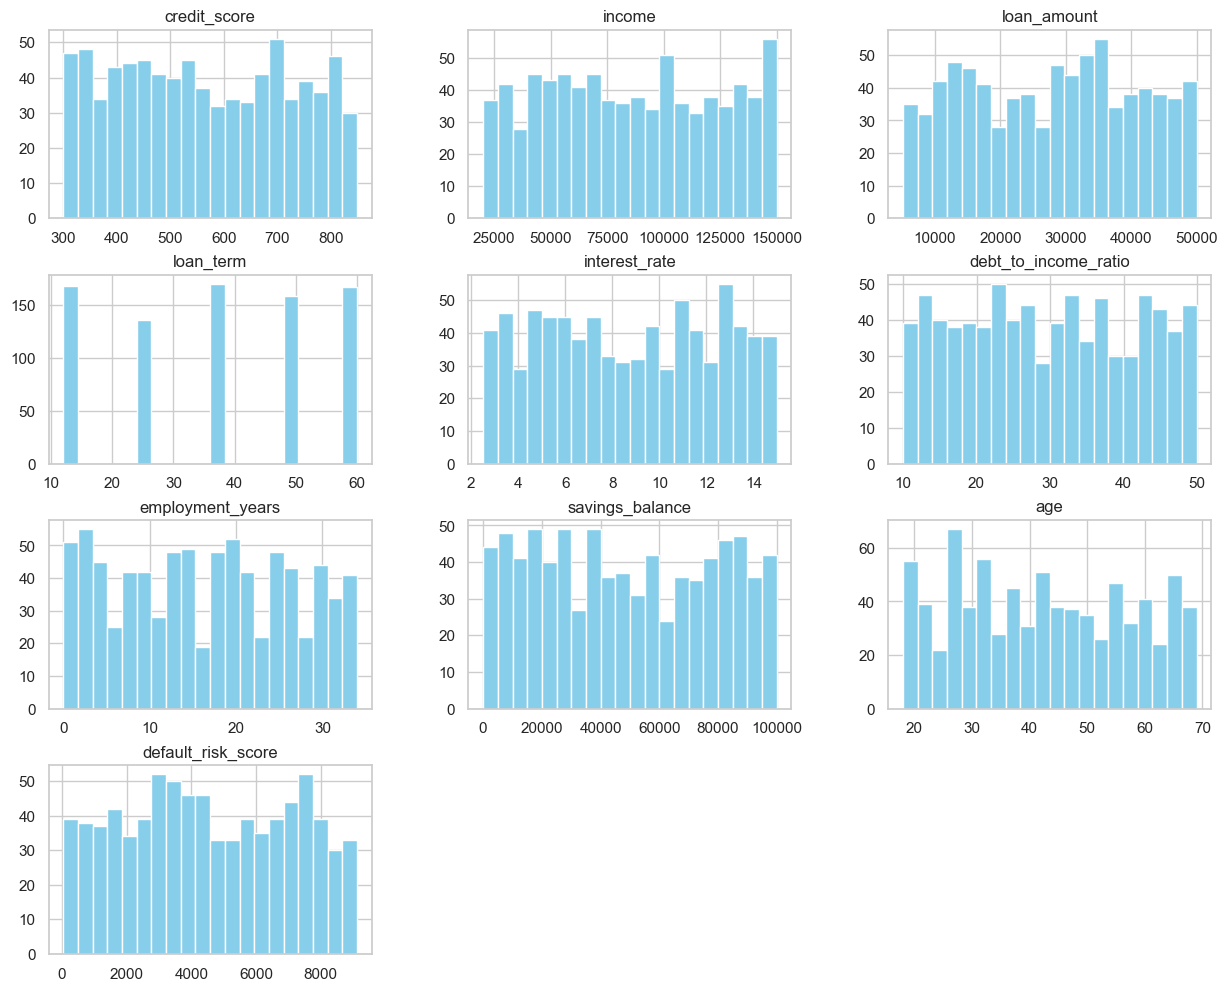

In [11]:
sns.set(style = 'whitegrid')
df.hist(bins = 20, figsize = (15, 12), color = 'skyblue');

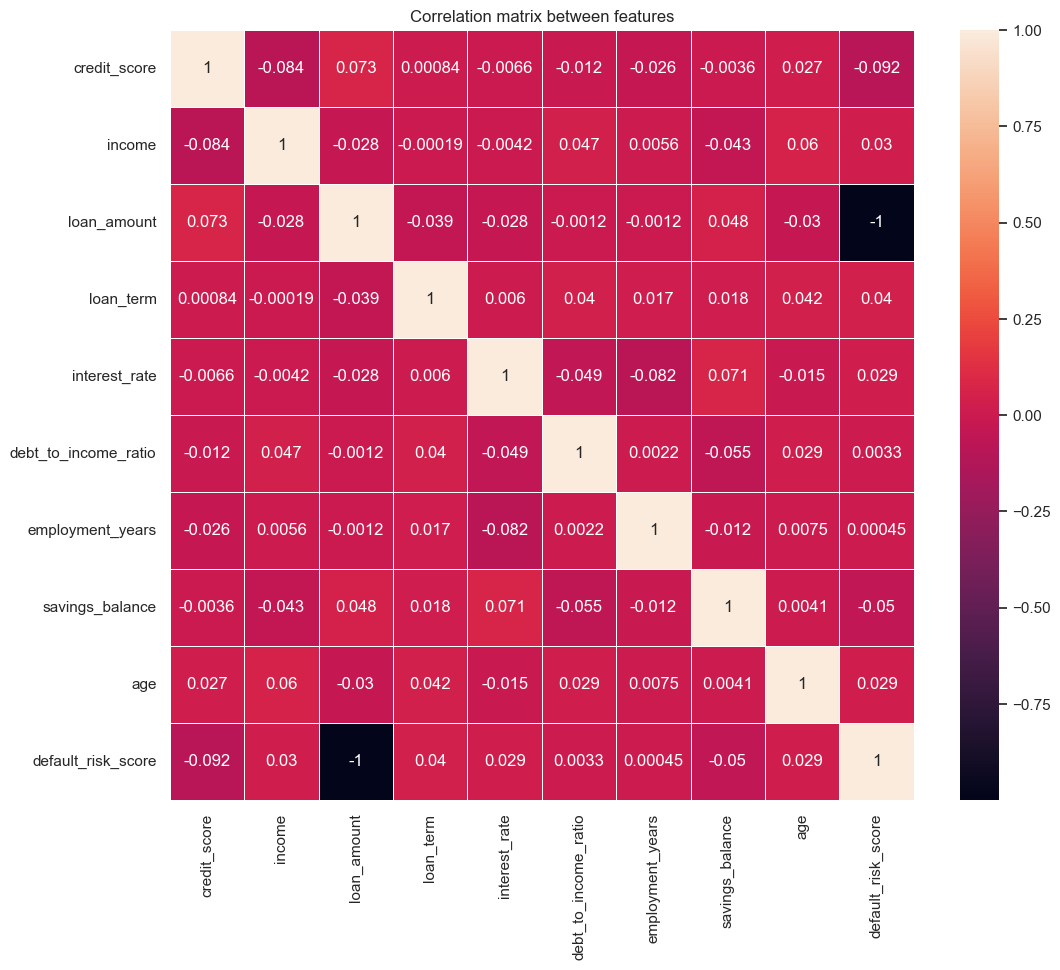

In [13]:
# Correlation matrix between features
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Adjust width and height
sns.heatmap(corr_matrix, annot=True, linewidth=.5)
plt.title("Correlation matrix between features")
plt.show()

In [35]:
# Correlation matrix between features
col_variables = ["credit_score", "income", "loan_amount", "interest_rate", "debt_to_income_ratio", "employemnt_years", "savings_balance", "age"]
corr_matrix = col_variables.corr()

plt.figure(figsize=(12, 10))  # Adjust width and height
sns.heatmap(corr_matrix, annot=True, linewidth=.5)
plt.title("Correlation matrix between features")
plt.show()

AttributeError: 'list' object has no attribute 'corr'

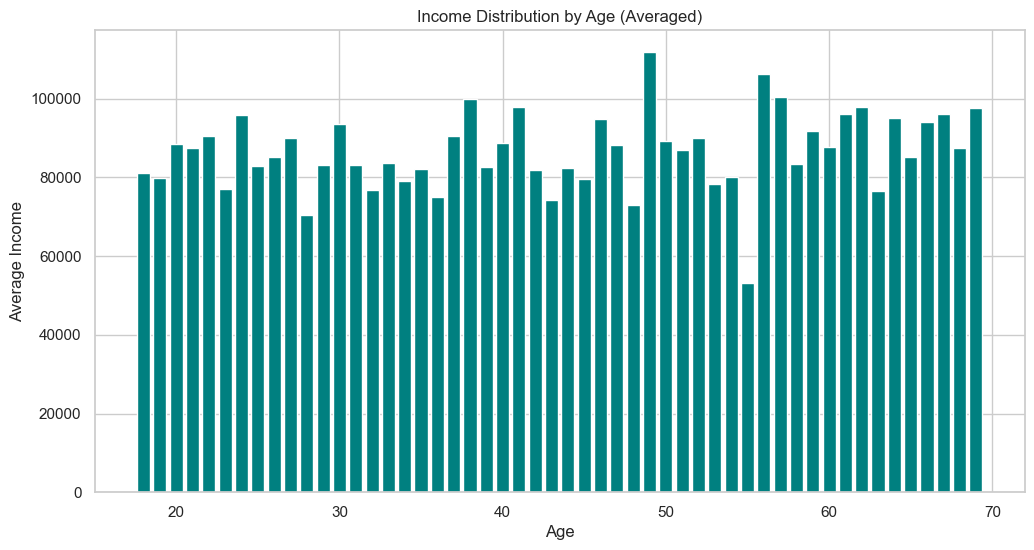

In [17]:
# distribution of income according to age
# Aggregate income by age (use mean or sum)
age_income = df.groupby('age')['income'].mean()

plt.figure(figsize=(12, 6))
plt.bar(age_income.index, age_income.values, color='teal', width=0.8)  # Increase width
plt.xlabel("Age")
plt.ylabel("Average Income")
plt.title("Income Distribution by Age (Averaged)")
plt.show()

#### Conclusion
- From the visualization above it shows that:
  1. People between the age of 49 are the highest earners followed by people between the age of 58-59.
  2. The lowest earners are people between the age of 55.
- Though the data is uniformly distributed, a conclusion can't be made fully in regards to it  

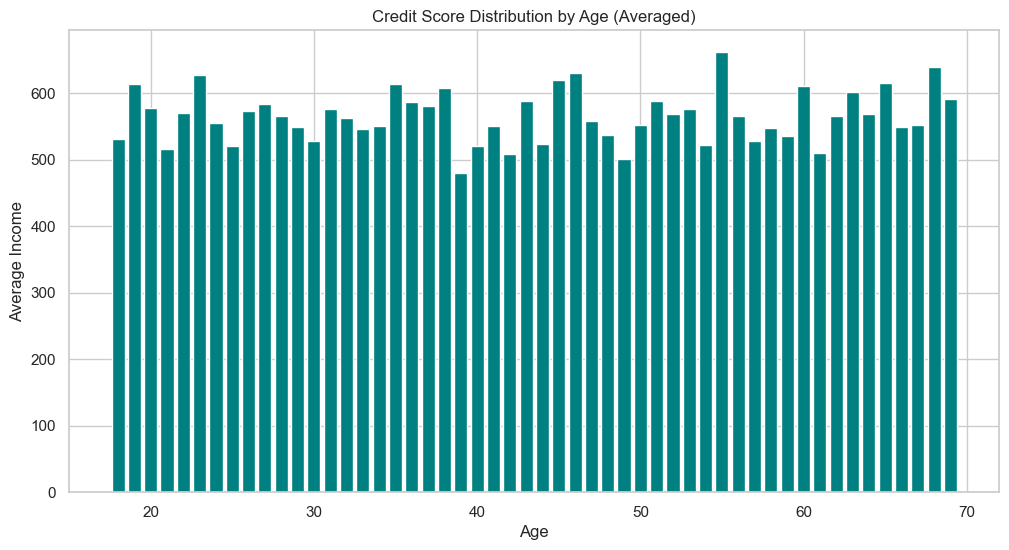

In [25]:
# distribution of credit-score according to age
# Aggregate income by age (use mean or sum)
age_credit_score = df.groupby('age')['credit_score'].mean()

plt.figure(figsize=(12, 6))
plt.bar(age_credit_score.index, age_credit_score.values, color='teal', width=0.8)  # Increase width
plt.xlabel("Age")
plt.ylabel("Average Income")
plt.title("Credit Score Distribution by Age (Averaged)")
plt.show()

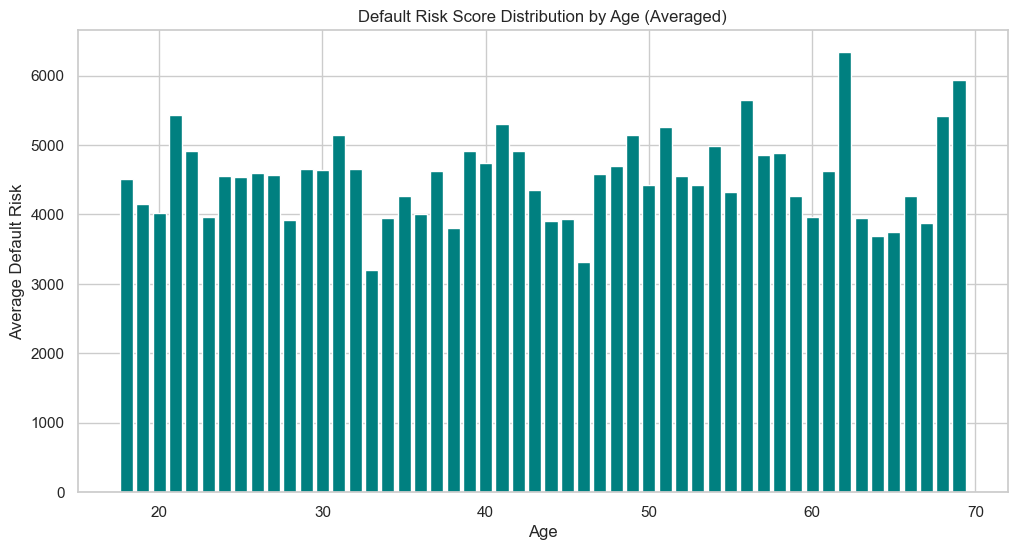

In [31]:
# Distribution of which age has a higher default risk
# Aggregate default_risk by age (use mean or sum)
age_default_risk = df.groupby('age')['default_risk_score'].mean()

plt.figure(figsize=(12, 6))
plt.bar(age_default_risk.index, age_default_risk.values, color='teal', width=0.8)  # Increase width
plt.xlabel("Age")
plt.ylabel("Average Default Risk")
plt.title("Default Risk Score Distribution by Age (Averaged)")
plt.show()

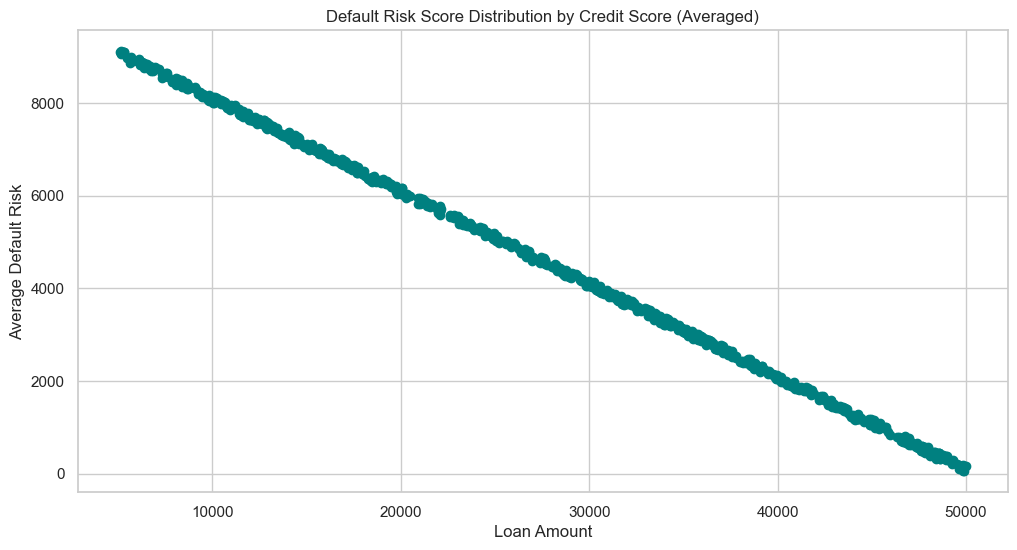

In [47]:
# Distribution of which age has a higher default risk
# Aggregate default_risk by age (use mean or sum)
age_default_risk = df.groupby('loan_amount')['default_risk_score'].mean()

plt.figure(figsize=(12, 6))
plt.scatter(age_default_risk.index, age_default_risk.values, color='teal')  # Increase width
plt.xlabel("Loan Amount")
plt.ylabel("Average Default Risk")
plt.title("Default Risk Score Distribution by Credit Score (Averaged)")
plt.show()

### Key Observations
1. The data is uniformly distributed and skewed to the right.
2. There's a correlation between the loan_amount and the default_risk_score.
3. Most people with high income range between the age of 49yrs
4. 